In [1]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
current_year = datetime.now().year

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Timmy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv('final_cleaned.csv', index_col = False)
car_data_encoded = pd.get_dummies(df, columns=['Model Full Name', 'Drivetrain', 'Vehicle Class'], drop_first=True)
selected_topics = ['Topic_0', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'Topic_7', 'Topic_8', 'Topic_9']

for topic in selected_topics:
    car_data_encoded[f'{topic}_Weighted'] = car_data_encoded[topic] * car_data_encoded['Sentiment Score']

weighted_topic_features = [f'{topic}_Weighted' for topic in selected_topics]
alpha_values = [0.1, 1.0, 10.0, 20, 50, 75, 100]

In [3]:
results_list = []

# Functional

In [5]:
df.head()

,Unnamed: 0,id,Car Brand,Car Model,Year,Review,Rating,Value Rating,Performance Rating,Quality Rating,...,Weighted Sentiment Score,Topic_0_Weighted,Topic_2_Weighted,Topic_3_Weighted,Topic_4_Weighted,Topic_5_Weighted,Topic_7_Weighted,Topic_8_Weighted,Topic_9_Weighted,Age
0,0,0,honda,accord,2010,I've driven my LX over 13 years and the only t...,5.0,5.0,5.0,5.0,...,5.246697,0.016897,0.027835,0.251757,0.155360,0.000000,0.000000,0.0000,0.013695,14
1,1,1,honda,accord,2010,I have this car for 10 years have given me no ...,5.0,5.0,5.0,5.0,...,2.804933,0.000000,0.000000,0.191840,0.000000,0.000000,0.000000,0.0000,0.000000,14
2,2,2,honda,accord,2010,"My 2012 Honda Accord is great, It handles grea...",5.0,4.0,5.0,5.0,...,2.024125,0.020700,0.002354,0.112178,0.034583,0.000000,0.017148,0.0000,0.000000,14
3,3,3,honda,accord,2010,My sibling has this car. I may be a computer p...,5.0,5.0,5.0,5.0,...,1.759561,0.008315,0.085711,0.000612,0.000000,0.000000,0.000000,0.0000,0.000000,14
4,4,4,honda,accord,2010,"I've had this car for 7 years, it's dependable...",5.0,5.0,5.0,5.0,...,4.582801,0.012000,0.012650,0.040147,0.096403,0.007267,0.008031,0.0087,0.019766,14


In [6]:
functional_features = [
    'Horsepower (hp)', 'Curb Weight (lbs)', 'Combined MPG', 'Fuel Capacity (gallons)', 'Age'
] + [col for col in car_data_encoded.columns if col.startswith('Drivetrain_')]

vehicle_class_features = [col for col in car_data_encoded.columns if col.startswith('Vehicle Class_')]

functional_features += vehicle_class_features

features = functional_features

### Functional Unaggregated

In [8]:
#unaggregated

y_price = car_data_encoded['Average KBB Fair Price ($)']
X = car_data_encoded[features]

X_train, X_test, y_train, y_test = train_test_split(X, y_price, test_size=0.2, random_state=15)


price_model = LinearRegression()
price_model.fit(X_train, y_train)
y_pred = price_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


price_coefficients = dict(zip(X.columns, price_model.coef_))

# Print R^2 and RMSE
print(f"R^2: {r2:.4f}")
print(f"\nRMSE: {rmse:.4f}")

# Print Model Coefficients
print(f"\nModel Coefficients:")
for feature, coef in price_coefficients.items():
    print(f"  {feature}: {coef:.4f}")

# Print Intercept
print(f"\nIntercept: {price_model.intercept_:.4f}")

division_title = "Functional Unaggregated"
model_type = "Linear Regression"

# Append the results to the list as a dictionary
results_list.append({
    "Division Title": division_title,
    "Model Type": model_type,
    "Best Alpha": None,
    "R^2": r2,
    "RMSE": rmse
})

R^2: 0.7800

RMSE: 4123.7972

Model Coefficients:
  Horsepower (hp): 47.0750
  Curb Weight (lbs): -2.1557
  Combined MPG: -7.0564
  Fuel Capacity (gallons): 185.2962
  Age: -1750.4193
  Drivetrain_4WD: 4185.8522
  Drivetrain_AWD: -854.1422
  Drivetrain_FWD: -2477.9903
  Drivetrain_RWD: 578.9442
  Vehicle Class_compact-suv: -935.3245
  Vehicle Class_electric-car: 3351.7157
  Vehicle Class_electric-suv: 4715.5914
  Vehicle Class_full-size: -1152.8683
  Vehicle Class_full-size-truck: -1012.8441
  Vehicle Class_hybrid-car: 559.6436
  Vehicle Class_hybrid-suv: -3184.6762
  Vehicle Class_luxury-hybrid-suv: 3100.9584
  Vehicle Class_mid-size: 1234.1979
  Vehicle Class_mid-size-suv: 967.6763
  Vehicle Class_mid-size-truck: 2313.9656
  Vehicle Class_minivan: 1583.3936

Intercept: 25117.5797


#### Functional Unaggregated Lasso

In [10]:
best_rmse = float('inf')  # Initialize with a very high RMSE
best_alpha = None
best_coefficients = None
best_intercept = None

# Loop through each alpha value
for alpha in alpha_values:
    # Initialize and train the Lasso model with the current alpha
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)
    
    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Print RMSE and R^2 for this alpha
    print(f"\nAlpha: {alpha}")
    print(f"  R^2: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    
    # Check if this model has the best RMSE so far
    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha
        best_r2 = r2
        best_coefficients = dict(zip(X.columns, lasso_model.coef_))
        best_intercept = lasso_model.intercept_

# Print the best alpha and its coefficients
print(f"\nBest Alpha based on RMSE: {best_alpha}")
print(f"Best R^2: {best_r2:.4f}")
print(f"Best RMSE: {best_rmse:.4f}")

# Print coefficients for the best alpha
print("\nModel Coefficients for the Best Alpha:")
for feature, coef in best_coefficients.items():
    print(f"  {feature}: {coef:.4f}")

# Print Intercept for the best alpha
print(f"\nIntercept: {best_intercept:.4f}")

division_title = "Functional Unaggregated"
model_type = "Lasso"

results_list.append({
    "Division Title": division_title,
    "Model Type": model_type,
    "Best Alpha": best_alpha,
    "R^2": best_r2,
    "RMSE": best_rmse
})



Alpha: 0.1
  R^2: 0.7800
  RMSE: 4123.7876

Alpha: 1.0
  R^2: 0.7800
  RMSE: 4123.8508

Alpha: 10.0
  R^2: 0.7789
  RMSE: 4133.9503

Alpha: 20
  R^2: 0.7767
  RMSE: 4154.4121

Alpha: 50
  R^2: 0.7714
  RMSE: 4203.6199

Alpha: 75
  R^2: 0.7671
  RMSE: 4243.3591

Alpha: 100
  R^2: 0.7631
  RMSE: 4279.5725

Best Alpha based on RMSE: 0.1
Best R^2: 0.7800
Best RMSE: 4123.7876

Model Coefficients for the Best Alpha:
  Horsepower (hp): 47.0864
  Curb Weight (lbs): -2.1578
  Combined MPG: -6.7547
  Fuel Capacity (gallons): 185.1604
  Age: -1750.1532
  Drivetrain_4WD: 4188.3909
  Drivetrain_AWD: -850.3292
  Drivetrain_FWD: -2474.4769
  Drivetrain_RWD: 581.1720
  Vehicle Class_compact-suv: -946.0962
  Vehicle Class_electric-car: 3316.0092
  Vehicle Class_electric-suv: 4678.1378
  Vehicle Class_full-size: -1160.8719
  Vehicle Class_full-size-truck: -1013.9349
  Vehicle Class_hybrid-car: 540.3572
  Vehicle Class_hybrid-suv: -3189.2031
  Vehicle Class_luxury-hybrid-suv: 3085.8788
  Vehicle Class_m

#### Functional Unaggregated Ridge

In [12]:
best_rmse = float('inf')  # Initialize with a very high RMSE
best_alpha = None
best_coefficients = None
best_intercept = None

# Loop through each alpha value
for alpha in alpha_values:
    # Initialize and train the Lasso model with the current alpha
    Ridge_model = Ridge(alpha=alpha)
    Ridge_model.fit(X_train, y_train)
    y_pred = Ridge_model.predict(X_test)
    
    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Print RMSE and R^2 for this alpha
    print(f"\nAlpha: {alpha}")
    print(f"  R^2: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    
    # Check if this model has the best RMSE so far
    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha
        best_r2 = r2
        best_coefficients = dict(zip(X.columns, lasso_model.coef_))
        best_intercept = lasso_model.intercept_

# Print the best alpha and its coefficients
print(f"\nBest Alpha based on RMSE: {best_alpha}")
print(f"Best R^2: {best_r2:.4f}")
print(f"Best RMSE: {best_rmse:.4f}")

# Print coefficients for the best alpha
print("\nModel Coefficients for the Best Alpha:")
for feature, coef in best_coefficients.items():
    print(f"  {feature}: {coef:.4f}")

# Print Intercept for the best alpha
print(f"\nIntercept: {best_intercept:.4f}")

division_title = "Functional Unaggregated"
model_type = "Ridge"

results_list.append({
    "Division Title": division_title,
    "Model Type": model_type,
    "Best Alpha": best_alpha,
    "R^2": best_r2,
    "RMSE": best_rmse
})


Alpha: 0.1
  R^2: 0.7800
  RMSE: 4123.7975

Alpha: 1.0
  R^2: 0.7800
  RMSE: 4123.8085

Alpha: 10.0
  R^2: 0.7799
  RMSE: 4124.4610

Alpha: 20
  R^2: 0.7798
  RMSE: 4125.6809

Alpha: 50
  R^2: 0.7794
  RMSE: 4129.9272

Alpha: 75
  R^2: 0.7790
  RMSE: 4133.5930

Alpha: 100
  R^2: 0.7786
  RMSE: 4137.2946

Best Alpha based on RMSE: 0.1
Best R^2: 0.7800
Best RMSE: 4123.7975

Model Coefficients for the Best Alpha:
  Horsepower (hp): 50.5524
  Curb Weight (lbs): -1.9881
  Combined MPG: 28.4664
  Fuel Capacity (gallons): 154.3158
  Age: -1707.4721
  Drivetrain_4WD: 2966.7014
  Drivetrain_AWD: -0.0000
  Drivetrain_FWD: -1681.0152
  Drivetrain_RWD: 0.0000
  Vehicle Class_compact-suv: -724.7318
  Vehicle Class_electric-car: 0.0000
  Vehicle Class_electric-suv: 0.0000
  Vehicle Class_full-size: -380.1131
  Vehicle Class_full-size-truck: -0.0000
  Vehicle Class_hybrid-car: -0.0000
  Vehicle Class_hybrid-suv: -0.0000
  Vehicle Class_luxury-hybrid-suv: 0.0000
  Vehicle Class_mid-size: 163.8108
  V

### Functional Aggregated

In [14]:
df[df['Average KBB Fair Price ($)'] == max(df['Average KBB Fair Price ($)'])]['Average KBB Fair Price ($)']

11811    74500.0
11812    74500.0
11813    74500.0
11814    74500.0
Name: Average KBB Fair Price ($), dtype: float64

In [15]:
#aggregated
aggregated_data = df.groupby(['Model Full Name', 'Year']).agg({
    'Horsepower (hp)': 'mean',
    'Curb Weight (lbs)': 'mean',
    'Combined MPG': 'mean',
    'Fuel Capacity (gallons)': 'mean',
    'Age': 'mean',
    'Average KBB Fair Price ($)': 'mean',
    'Vehicle Class': 'first',
    'Car Brand': 'first',
    'Car Model': 'first',
    'Drivetrain': 'first'
}).reset_index()

car_data_encoded_agg = pd.get_dummies(aggregated_data, columns=['Car Brand', 'Car Model', 'Drivetrain', 'Vehicle Class'], drop_first=True)

y_price = car_data_encoded_agg['Average KBB Fair Price ($)']
X = car_data_encoded_agg[functional_features]

X_train, X_test, y_train, y_test = train_test_split(X, y_price, test_size=0.2, random_state=15)


price_model = LinearRegression()
price_model.fit(X_train, y_train)
y_pred = price_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


price_coefficients = dict(zip(X.columns, price_model.coef_))

# Print R^2 and RMSE
print(f"R^2: {r2:.4f}")
print(f"\nRMSE: {rmse:.4f}")

# Print Model Coefficients
print("Model Coefficients:")
for feature, coef in price_coefficients.items():
    print(f"  {feature}: {coef:.4f}")

# Print Intercept
print(f"\nIntercept: {price_model.intercept_:.4f}")

division_title = "Functional Aggregated"
model_type = "Linear Regression"

results_list.append({
    "Division Title": division_title,
    "Model Type": model_type,
    "Best Alpha": None,
    "R^2": r2,
    "RMSE": rmse
})


R^2: 0.6385

RMSE: 5149.0639
Model Coefficients:
  Horsepower (hp): 45.7558
  Curb Weight (lbs): -0.8214
  Combined MPG: 11.3679
  Fuel Capacity (gallons): 190.6051
  Age: -2057.9485
  Drivetrain_4WD: 3148.6491
  Drivetrain_AWD: -2380.2253
  Drivetrain_FWD: -3474.6153
  Drivetrain_RWD: -453.2229
  Vehicle Class_compact-suv: -229.2713
  Vehicle Class_electric-car: 6718.1756
  Vehicle Class_electric-suv: 4723.7591
  Vehicle Class_full-size: -673.6605
  Vehicle Class_full-size-truck: -3125.2154
  Vehicle Class_hybrid-car: 1138.7061
  Vehicle Class_hybrid-suv: -2870.1388
  Vehicle Class_luxury-hybrid-suv: 5894.6217
  Vehicle Class_mid-size: 2429.0707
  Vehicle Class_mid-size-suv: 1234.6862
  Vehicle Class_mid-size-truck: 1678.9081
  Vehicle Class_minivan: 2773.7374

Intercept: 23573.2972


#### Functional Aggregated Lasso

In [17]:
best_rmse = float('inf')  # Initialize with a very high RMSE
best_alpha = None
best_coefficients = None
best_intercept = None

# Loop through each alpha value
for alpha in alpha_values:
    # Initialize and train the Lasso model with the current alpha
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)
    
    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Print RMSE and R^2 for this alpha
    print(f"\nAlpha: {alpha}")
    print(f"  R^2: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    
    # Check if this model has the best RMSE so far
    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha
        best_r2 = r2
        best_coefficients = dict(zip(X.columns, lasso_model.coef_))
        best_intercept = lasso_model.intercept_

# Print the best alpha and its coefficients
print(f"\nBest Alpha based on RMSE: {best_alpha}")
print(f"Best R^2: {best_r2:.4f}")
print(f"Best RMSE: {best_rmse:.4f}")

# Print coefficients for the best alpha
print("\nModel Coefficients for the Best Alpha:")
for feature, coef in best_coefficients.items():
    print(f"  {feature}: {coef:.4f}")

# Print Intercept for the best alpha
print(f"\nIntercept: {best_intercept:.4f}")

division_title = "Functional Aggregated"
model_type = "Lasso"

results_list.append({
    "Division Title": division_title,
    "Model Type": model_type,
    "Best Alpha": best_alpha,
    "R^2": best_r2,
    "RMSE": best_rmse
})



Alpha: 0.1
  R^2: 0.6385
  RMSE: 5148.5454

Alpha: 1.0
  R^2: 0.6392
  RMSE: 5143.9452

Alpha: 10.0
  R^2: 0.6456
  RMSE: 5097.6044

Alpha: 20
  R^2: 0.6522
  RMSE: 5050.5609

Alpha: 50
  R^2: 0.6671
  RMSE: 4940.9886

Alpha: 75
  R^2: 0.6650
  RMSE: 4956.2718

Alpha: 100
  R^2: 0.6615
  RMSE: 4981.9476

Best Alpha based on RMSE: 50
Best R^2: 0.6671
Best RMSE: 4940.9886

Model Coefficients for the Best Alpha:
  Horsepower (hp): 47.9925
  Curb Weight (lbs): -0.7069
  Combined MPG: 59.0446
  Fuel Capacity (gallons): 155.3588
  Age: -1997.8836
  Drivetrain_4WD: 2846.8334
  Drivetrain_AWD: -1403.4119
  Drivetrain_FWD: -2394.1749
  Drivetrain_RWD: 0.0000
  Vehicle Class_compact-suv: -968.2172
  Vehicle Class_electric-car: 0.0000
  Vehicle Class_electric-suv: 0.0000
  Vehicle Class_full-size: -1159.6788
  Vehicle Class_full-size-truck: -1729.4023
  Vehicle Class_hybrid-car: -0.0000
  Vehicle Class_hybrid-suv: -1237.8625
  Vehicle Class_luxury-hybrid-suv: 3068.9498
  Vehicle Class_mid-size: 

#### Functional Aggregated Ridge

In [19]:
best_rmse = float('inf')  # Initialize with a very high RMSE
best_alpha = None
best_coefficients = None
best_intercept = None

# Loop through each alpha value
for alpha in alpha_values:
    # Initialize and train the Lasso model with the current alpha
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    
    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Print RMSE and R^2 for this alpha
    print(f"\nAlpha: {alpha}")
    print(f"  R^2: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    
    # Check if this model has the best RMSE so far
    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha
        best_r2 = r2
        best_coefficients = dict(zip(X.columns, lasso_model.coef_))
        best_intercept = lasso_model.intercept_

# Print the best alpha and its coefficients
print(f"\nBest Alpha based on RMSE: {best_alpha}")
print(f"Best R^2: {best_r2:.4f}")
print(f"Best RMSE: {best_rmse:.4f}")

# Print coefficients for the best alpha
print("\nModel Coefficients for the Best Alpha:")
for feature, coef in best_coefficients.items():
    print(f"  {feature}: {coef:.4f}")

# Print Intercept for the best alpha
print(f"\nIntercept: {best_intercept:.4f}")

division_title = "Functional Aggregated"
model_type = "Ridge"

results_list.append({
    "Division Title": division_title,
    "Model Type": model_type,
    "Best Alpha": best_alpha,
    "R^2": best_r2,
    "RMSE": best_rmse
})


Alpha: 0.1
  R^2: 0.6397
  RMSE: 5140.4791

Alpha: 1.0
  R^2: 0.6469
  RMSE: 5088.8217

Alpha: 10.0
  R^2: 0.6616
  RMSE: 4981.1846

Alpha: 20
  R^2: 0.6616
  RMSE: 4981.4550

Alpha: 50
  R^2: 0.6571
  RMSE: 5014.4001

Alpha: 75
  R^2: 0.6549
  RMSE: 5030.7190

Alpha: 100
  R^2: 0.6538
  RMSE: 5038.9718

Best Alpha based on RMSE: 10.0
Best R^2: 0.6616
Best RMSE: 4981.1846

Model Coefficients for the Best Alpha:
  Horsepower (hp): 49.8100
  Curb Weight (lbs): -0.5408
  Combined MPG: 60.2715
  Fuel Capacity (gallons): 121.7582
  Age: -1981.5986
  Drivetrain_4WD: 2389.6341
  Drivetrain_AWD: -721.1558
  Drivetrain_FWD: -1735.8183
  Drivetrain_RWD: 0.0000
  Vehicle Class_compact-suv: -455.5424
  Vehicle Class_electric-car: 0.0000
  Vehicle Class_electric-suv: 0.0000
  Vehicle Class_full-size: -436.3474
  Vehicle Class_full-size-truck: -0.0000
  Vehicle Class_hybrid-car: -0.0000
  Vehicle Class_hybrid-suv: -0.0000
  Vehicle Class_luxury-hybrid-suv: 1432.3028
  Vehicle Class_mid-size: 736.63

# Functional and Experiential

### Functional and Experiental Unaggregated

In [22]:
features = (functional_features + weighted_topic_features + [col for col in car_data_encoded.columns if col.startswith('Car Brand_')] 
    + [col for col in car_data_encoded.columns if col.startswith('Car Model_')])

X = car_data_encoded[features]
y_price = car_data_encoded['Average KBB Fair Price ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y_price, test_size=0.2, random_state=15)


price_model = LinearRegression()
price_model.fit(X_train, y_train)
y_pred = price_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


price_coefficients = dict(zip(X.columns, price_model.coef_))

print(f"R^2: {r2:.4f}")
print(f"\nRMSE: {rmse:.4f}")

# Print Model Coefficients
print(f"\nModel Coefficients:")
for feature, coef in price_coefficients.items():
    print(f"  {feature}: {coef:.4f}")

# Print Intercept
print(f"\nIntercept: {price_model.intercept_:.4f}")

division_title = "Functional & Experiential Unaggregated"
model_type = "Linear Regression"

results_list.append({
    "Division Title": division_title,
    "Model Type": model_type,
    "Best Alpha": None,
    "R^2": r2,
    "RMSE": rmse
})

R^2: 0.7804

RMSE: 4119.9597

Model Coefficients:
  Horsepower (hp): 47.0802
  Curb Weight (lbs): -2.1363
  Combined MPG: -7.5003
  Fuel Capacity (gallons): 181.9903
  Age: -1758.5462
  Drivetrain_4WD: 4154.8044
  Drivetrain_AWD: -861.7306
  Drivetrain_FWD: -2481.1808
  Drivetrain_RWD: 570.1905
  Vehicle Class_compact-suv: -909.4334
  Vehicle Class_electric-car: 3353.8514
  Vehicle Class_electric-suv: 4694.3379
  Vehicle Class_full-size: -1156.0179
  Vehicle Class_full-size-truck: -915.1183
  Vehicle Class_hybrid-car: 550.5377
  Vehicle Class_hybrid-suv: -3211.2106
  Vehicle Class_luxury-hybrid-suv: 3104.0456
  Vehicle Class_mid-size: 1232.0445
  Vehicle Class_mid-size-suv: 968.3939
  Vehicle Class_mid-size-truck: 2414.4412
  Vehicle Class_minivan: 1587.5256
  Topic_0_Weighted: -9032.1368
  Topic_2_Weighted: -2795.6656
  Topic_3_Weighted: 8249.8938
  Topic_4_Weighted: 1301.4291
  Topic_5_Weighted: -4138.0663
  Topic_7_Weighted: -786.7443
  Topic_8_Weighted: 3235.1823
  Topic_9_Weighted

#### Functional and Experiental Unaggregated Lasso

In [24]:
best_rmse = float('inf')  # Initialize with a very high RMSE
best_alpha = None
best_coefficients = None
best_intercept = None

# Loop through each alpha value
for alpha in alpha_values:
    # Initialize and train the Lasso model with the current alpha
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)
    
    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Print RMSE and R^2 for this alpha
    print(f"\nAlpha: {alpha}")
    print(f"  R^2: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    
    # Check if this model has the best RMSE so far
    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha
        best_r2 = r2
        best_coefficients = dict(zip(X.columns, lasso_model.coef_))
        best_intercept = lasso_model.intercept_

# Print the best alpha and its coefficients
print(f"\nBest Alpha based on RMSE: {best_alpha}")
print(f"Best R^2: {best_r2:.4f}")
print(f"Best RMSE: {best_rmse:.4f}")

# Print coefficients for the best alpha
print("\nModel Coefficients for the Best Alpha:")
for feature, coef in best_coefficients.items():
    print(f"  {feature}: {coef:.4f}")

# Print Intercept for the best alpha
print(f"\nIntercept: {best_intercept:.4f}")

division_title = "Functional & Experiential Unaggregated"
model_type = "Lasso"

results_list.append({
    "Division Title": division_title,
    "Model Type": model_type,
    "Best Alpha": best_alpha,
    "R^2": best_r2,
    "RMSE": best_rmse
})


Alpha: 0.1
  R^2: 0.7804
  RMSE: 4120.2240

Alpha: 1.0
  R^2: 0.7801
  RMSE: 4122.9611

Alpha: 10.0
  R^2: 0.7789
  RMSE: 4133.9503

Alpha: 20
  R^2: 0.7767
  RMSE: 4154.4121

Alpha: 50
  R^2: 0.7714
  RMSE: 4203.6199

Alpha: 75
  R^2: 0.7671
  RMSE: 4243.3591

Alpha: 100
  R^2: 0.7631
  RMSE: 4279.5725

Best Alpha based on RMSE: 0.1
Best R^2: 0.7804
Best RMSE: 4120.2240

Model Coefficients for the Best Alpha:
  Horsepower (hp): 47.0944
  Curb Weight (lbs): -2.1398
  Combined MPG: -7.1664
  Fuel Capacity (gallons): 182.1827
  Age: -1757.7898
  Drivetrain_4WD: 4160.3617
  Drivetrain_AWD: -856.9403
  Drivetrain_FWD: -2476.9946
  Drivetrain_RWD: 572.9965
  Vehicle Class_compact-suv: -923.4231
  Vehicle Class_electric-car: 3316.0457
  Vehicle Class_electric-suv: 4657.9417
  Vehicle Class_full-size: -1164.1596
  Vehicle Class_full-size-truck: -928.1435
  Vehicle Class_hybrid-car: 530.2657
  Vehicle Class_hybrid-suv: -3214.0067
  Vehicle Class_luxury-hybrid-suv: 3088.0138
  Vehicle Class_mi

#### Functional and Experiental Unaggregated Ridge

In [26]:
best_rmse = float('inf')  # Initialize with a very high RMSE
best_alpha = None
best_coefficients = None
best_intercept = None

# Loop through each alpha value
for alpha in alpha_values:
    # Initialize and train the Lasso model with the current alpha
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    
    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Print RMSE and R^2 for this alpha
    print(f"\nAlpha: {alpha}")
    print(f"  R^2: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    
    # Check if this model has the best RMSE so far
    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha
        best_r2 = r2
        best_coefficients = dict(zip(X.columns, lasso_model.coef_))
        best_intercept = lasso_model.intercept_

# Print the best alpha and its coefficients
print(f"\nBest Alpha based on RMSE: {best_alpha}")
print(f"Best R^2: {best_r2:.4f}")
print(f"Best RMSE: {best_rmse:.4f}")

# Print coefficients for the best alpha
print("\nModel Coefficients for the Best Alpha:")
for feature, coef in best_coefficients.items():
    print(f"  {feature}: {coef:.4f}")

# Print Intercept for the best alpha
print(f"\nIntercept: {best_intercept:.4f}")

division_title = "Functional & Experiential Unaggregated"
model_type = "Ridge"

results_list.append({
    "Division Title": division_title,
    "Model Type": model_type,
    "Best Alpha": best_alpha,
    "R^2": best_r2,
    "RMSE": best_rmse
})


Alpha: 0.1
  R^2: 0.7804
  RMSE: 4119.8958

Alpha: 1.0
  R^2: 0.7804
  RMSE: 4119.8950

Alpha: 10.0
  R^2: 0.7801
  RMSE: 4122.7000

Alpha: 20
  R^2: 0.7799
  RMSE: 4124.6306

Alpha: 50
  R^2: 0.7794
  RMSE: 4129.4592

Alpha: 75
  R^2: 0.7790
  RMSE: 4133.2754

Alpha: 100
  R^2: 0.7786
  RMSE: 4137.0553

Best Alpha based on RMSE: 1.0
Best R^2: 0.7804
Best RMSE: 4119.8950

Model Coefficients for the Best Alpha:
  Horsepower (hp): 50.5524
  Curb Weight (lbs): -1.9881
  Combined MPG: 28.4664
  Fuel Capacity (gallons): 154.3158
  Age: -1707.4721
  Drivetrain_4WD: 2966.7014
  Drivetrain_AWD: -0.0000
  Drivetrain_FWD: -1681.0152
  Drivetrain_RWD: 0.0000
  Vehicle Class_compact-suv: -724.7318
  Vehicle Class_electric-car: 0.0000
  Vehicle Class_electric-suv: 0.0000
  Vehicle Class_full-size: -380.1131
  Vehicle Class_full-size-truck: -0.0000
  Vehicle Class_hybrid-car: -0.0000
  Vehicle Class_hybrid-suv: -0.0000
  Vehicle Class_luxury-hybrid-suv: 0.0000
  Vehicle Class_mid-size: 163.8108
  V

### Functional and Experiental Aggregated

In [28]:
df.columns

Index(['Unnamed: 0', 'id', 'Car Brand', 'Car Model', 'Year', 'Review',
       'Rating', 'Value Rating', 'Performance Rating', 'Quality Rating',
       'Comfort Rating', 'Reliability Rating', 'Styling Rating',
       'Vehicle Class', 'Model Full Name', 'Horsepower (hp)',
       'Curb Weight (lbs)', 'Combined MPG', 'Fuel Capacity (gallons)',
       'Drivetrain', 'Recommended Fuel', 'Average MSRP Price ($)',
       'Average KBB Fair Price ($)', 'Review_Topics', 'Topic_0', 'Topic_1',
       'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'Topic_6', 'Topic_7',
       'Topic_8', 'Topic_9', 'Sentiment Score', 'Depreciated Value',
       'Sentiment Bin', 'Weighted Sentiment Score', 'Topic_0_Weighted',
       'Topic_2_Weighted', 'Topic_3_Weighted', 'Topic_4_Weighted',
       'Topic_5_Weighted', 'Topic_7_Weighted', 'Topic_8_Weighted',
       'Topic_9_Weighted', 'Age'],
      dtype='object')

In [30]:
car_data_encoded_agg.head()

,Model Full Name,Year,Horsepower (hp),Curb Weight (lbs),Combined MPG,Fuel Capacity (gallons),Age,Average KBB Fair Price ($),Car Brand_alfa-romeo,Car Brand_audi,...,Vehicle Class_electric-suv,Vehicle Class_full-size,Vehicle Class_full-size-truck,Vehicle Class_hybrid-car,Vehicle Class_hybrid-suv,Vehicle Class_luxury-hybrid-suv,Vehicle Class_mid-size,Vehicle Class_mid-size-suv,Vehicle Class_mid-size-truck,Vehicle Class_minivan
0,Acura Rdx,2010,240.0,3931.0,19.0,18.0,14.0,7210.0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,Acura Rdx,2013,273.0,3838.0,22.0,16.0,11.0,10589.0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,Acura Rdx,2019,272.0,3783.0,24.0,17.1,5.0,23046.5,False,False,...,False,False,False,False,False,False,False,True,False,False
3,Acura Tlx,2015,206.0,3483.0,28.0,17.2,9.0,11905.5,False,False,...,False,False,False,False,False,False,True,False,False,False
4,Acura Tlx,2021,272.0,3709.0,25.0,15.9,3.0,29701.0,False,False,...,False,False,False,False,False,False,True,False,False,False


In [31]:
car_data_encoded_agg.columns

Index(['Model Full Name', 'Year', 'Horsepower (hp)', 'Curb Weight (lbs)',
       'Combined MPG', 'Fuel Capacity (gallons)', 'Age',
       'Average KBB Fair Price ($)', 'Car Brand_alfa-romeo', 'Car Brand_audi',
       ...
       'Vehicle Class_electric-suv', 'Vehicle Class_full-size',
       'Vehicle Class_full-size-truck', 'Vehicle Class_hybrid-car',
       'Vehicle Class_hybrid-suv', 'Vehicle Class_luxury-hybrid-suv',
       'Vehicle Class_mid-size', 'Vehicle Class_mid-size-suv',
       'Vehicle Class_mid-size-truck', 'Vehicle Class_minivan'],
      dtype='object', length=221)

In [32]:
#aggregated
aggregated_data = df.groupby(['Model Full Name', 'Year']).agg({
    'Horsepower (hp)': 'mean',
    'Curb Weight (lbs)': 'mean',
    'Combined MPG': 'mean',
    'Fuel Capacity (gallons)': 'mean',
    'Age': 'mean',
    'Average KBB Fair Price ($)': 'mean',
    'Vehicle Class': 'first',
    'Car Brand': 'first',
    #'Car Model': 'first',
    'Topic_0_Weighted': 'mean',
    'Topic_2_Weighted': 'mean', 
    'Topic_3_Weighted': 'mean', 
    'Topic_4_Weighted': 'mean',
    'Topic_5_Weighted': 'mean', 
    'Topic_7_Weighted': 'mean', 
    'Topic_8_Weighted': 'mean',
    'Topic_9_Weighted': 'mean',
    'Drivetrain': 'first'
}).reset_index()

car_data_encoded_agg = pd.get_dummies(aggregated_data, columns=['Car Brand', 'Drivetrain', 'Vehicle Class'], drop_first=True)


X = car_data_encoded_agg.drop(columns=['Average KBB Fair Price ($)','Model Full Name'])
y_price = car_data_encoded_agg['Average KBB Fair Price ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y_price, test_size=0.2, random_state=15)


price_model = LinearRegression()
price_model.fit(X_train, y_train)
y_pred = price_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


price_coefficients = dict(zip(X.columns, price_model.coef_))

# Print R^2 and RMSE
print(f"R^2: {r2:.4f}")
print(f"\nRMSE: {rmse:.4f}")

# Print Model Coefficients
print(f"\nModel Coefficients:")
for feature, coef in price_coefficients.items():
    print(f"  {feature}: {coef:.4f}")

# Print Intercept
print(f"\nIntercept: {price_model.intercept_:.4f}")

division_title = "Functional & Experiential Aggregated"
model_type = "Linear Regression"

results_list.append({
    "Division Title": division_title,
    "Model Type": model_type,
    "Best Alpha": None,
    "R^2": r2,
    "RMSE": rmse
})


R^2: 0.6418

RMSE: 5125.4296

Model Coefficients:
  Year: 1054.7543
  Horsepower (hp): 41.3409
  Curb Weight (lbs): -1.1459
  Combined MPG: -39.4635
  Fuel Capacity (gallons): 286.1528
  Age: -1054.7543
  Topic_0_Weighted: -10652.3721
  Topic_2_Weighted: -18371.5924
  Topic_3_Weighted: 3694.2316
  Topic_4_Weighted: 17846.6242
  Topic_5_Weighted: -5344.4536
  Topic_7_Weighted: -5219.5138
  Topic_8_Weighted: 1886.8826
  Topic_9_Weighted: 3623.3385
  Car Brand_alfa-romeo: -4781.3345
  Car Brand_audi: -1394.1298
  Car Brand_bmw: -503.4102
  Car Brand_buick: -403.8515
  Car Brand_cadillac: -1767.0756
  Car Brand_chevrolet: 2673.1271
  Car Brand_chrysler: -1338.8401
  Car Brand_dodge: 2374.7856
  Car Brand_fiat: -3997.7462
  Car Brand_ford: -396.2822
  Car Brand_genesis: 936.0639
  Car Brand_gmc: 1598.7437
  Car Brand_honda: 417.2032
  Car Brand_hyundai: -2226.9507
  Car Brand_infiniti: -5729.8487
  Car Brand_jaguar: -5189.8643
  Car Brand_jeep: 939.6090
  Car Brand_kia: -2037.6115
  Car Bra

#### Functional and Experiental Aggregated lasso

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your input features

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_price, test_size=0.2, random_state=15)

best_rmse = float('inf')  # Initialize with a very high RMSE
best_alpha = None
best_coefficients = None
best_intercept = None

# Loop through each alpha value
for alpha in alpha_values:
    # Initialize and train the Lasso model with the current alpha
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)
    
    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Print RMSE and R^2 for this alpha
    print(f"\nAlpha: {alpha}")
    print(f"  R^2: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    
    # Check if this model has the best RMSE so far
    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha
        best_r2 = r2
        best_coefficients = dict(zip(X.columns, lasso_model.coef_))
        best_intercept = lasso_model.intercept_

# Print the best alpha and its coefficients
print(f"\nBest Alpha based on RMSE: {best_alpha}")
print(f"Best R^2: {best_r2:.4f}")
print(f"Best RMSE: {best_rmse:.4f}")

# Print coefficients for the best alpha
print("\nModel Coefficients for the Best Alpha:")
for feature, coef in best_coefficients.items():
    print(f"  {feature}: {coef:.4f}")

# Print Intercept for the best alpha
print(f"\nIntercept: {best_intercept:.4f}")

division_title = "Functional & Experiential Aggregated"
model_type = "Lasso"

results_list.append({
    "Division Title": division_title,
    "Model Type": model_type,
    "Best Alpha": best_alpha,
    "R^2": best_r2,
    "RMSE": best_rmse
})



Alpha: 0.1
  R^2: 0.6419
  RMSE: 5124.5463

Alpha: 1.0
  R^2: 0.6430
  RMSE: 5116.3409

Alpha: 10.0
  R^2: 0.6538
  RMSE: 5038.6480

Alpha: 20
  R^2: 0.6628
  RMSE: 4972.8717

Alpha: 50
  R^2: 0.6835
  RMSE: 4817.4347

Alpha: 75
  R^2: 0.6970
  RMSE: 4713.8157

Alpha: 100
  R^2: 0.7050
  RMSE: 4650.9941

Best Alpha based on RMSE: 100
Best R^2: 0.7050
Best RMSE: 4650.9941

Model Coefficients for the Best Alpha:
  Year: 8988.0880
  Horsepower (hp): 3438.1293
  Curb Weight (lbs): -323.6321
  Combined MPG: 0.0000
  Fuel Capacity (gallons): 370.1095
  Age: -84.2382
  Topic_0_Weighted: -130.5556
  Topic_2_Weighted: -212.1901
  Topic_3_Weighted: 31.9547
  Topic_4_Weighted: 166.6194
  Topic_5_Weighted: -0.0000
  Topic_7_Weighted: -24.1594
  Topic_8_Weighted: 0.0000
  Topic_9_Weighted: 0.0000
  Car Brand_alfa-romeo: -241.3065
  Car Brand_audi: -34.7836
  Car Brand_bmw: -0.0000
  Car Brand_buick: -69.9984
  Car Brand_cadillac: -12.6860
  Car Brand_chevrolet: 709.5547
  Car Brand_chrysler: -25.1

C:\Users\Timmy\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.016e+08, tolerance: 3.792e+06
  model = cd_fast.enet_coordinate_descent(


#### Functional and Experiental Aggregated Ridge

In [59]:
feature_means = scaler.mean_
feature_stds = scaler.scale_
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_price, test_size=0.2, random_state=15)

best_rmse = float('inf')  # Initialize with a very high RMSE
best_alpha = None
best_coefficients = None
best_intercept = None

# Loop through each alpha value
for alpha in alpha_values:
    # Initialize and train the Lasso model with the current alpha
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    
    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Print RMSE and R^2 for this alpha
    print(f"\nAlpha: {alpha}")
    print(f"  R^2: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    
    # Check if this model has the best RMSE so far
    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha
        best_r2 = r2
        best_coefficients = dict(zip(X.columns, lasso_model.coef_))
        best_intercept = lasso_model.intercept_

# Print the best alpha and its coefficients
print(f"\nBest Alpha based on RMSE: {best_alpha}")
print(f"Best R^2: {best_r2:.4f}")
print(f"Best RMSE: {best_rmse:.4f}")

# Print coefficients for the best alpha
print("\nModel Coefficients for the Best Alpha:")
for feature, coef in best_coefficients.items():
    print(f"  {feature}: {coef:.4f}")

# Print Intercept for the best alpha
print(f"\nIntercept: {best_intercept:.4f}")

division_title = "Functional & Experiential Aggregated"
model_type = "Ridge"

results_list.append({
    "Division Title": division_title,
    "Model Type": model_type,
    "Best Alpha": best_alpha,
    "R^2": best_r2,
    "RMSE": best_rmse
})


Alpha: 0.1
  R^2: 0.6423
  RMSE: 5121.7153

Alpha: 1.0
  R^2: 0.6467
  RMSE: 5089.9815

Alpha: 10.0
  R^2: 0.6768
  RMSE: 4868.0279

Alpha: 20
  R^2: 0.6970
  RMSE: 4713.9772

Alpha: 50
  R^2: 0.7293
  RMSE: 4455.8075

Alpha: 75
  R^2: 0.7425
  RMSE: 4345.2220

Alpha: 100
  R^2: 0.7497
  RMSE: 4284.0240

Best Alpha based on RMSE: 100
Best R^2: 0.7497
Best RMSE: 4284.0240

Model Coefficients for the Best Alpha:
  Year: 8988.0880
  Horsepower (hp): 3438.1293
  Curb Weight (lbs): -323.6321
  Combined MPG: 0.0000
  Fuel Capacity (gallons): 370.1095
  Age: -84.2382
  Topic_0_Weighted: -130.5556
  Topic_2_Weighted: -212.1901
  Topic_3_Weighted: 31.9547
  Topic_4_Weighted: 166.6194
  Topic_5_Weighted: -0.0000
  Topic_7_Weighted: -24.1594
  Topic_8_Weighted: 0.0000
  Topic_9_Weighted: 0.0000
  Car Brand_alfa-romeo: -241.3065
  Car Brand_audi: -34.7836
  Car Brand_bmw: -0.0000
  Car Brand_buick: -69.9984
  Car Brand_cadillac: -12.6860
  Car Brand_chevrolet: 709.5547
  Car Brand_chrysler: -25.1

# Ridge with Unscaled

In [64]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your input features
feature_means = scaler.mean_
feature_stds = scaler.scale_

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_price, test_size=0.2, random_state=15)

best_rmse = float('inf')  # Initialize with a very high RMSE
best_alpha = None
best_coefficients = None
best_intercept = None

# Loop through each alpha value
for alpha in alpha_values:
    # Initialize and train the Ridge model with the current alpha
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    
    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Print RMSE and R^2 for this alpha
    print(f"\nAlpha: {alpha}")
    print(f"  R^2: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    
    # Check if this model has the best RMSE so far
    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha
        best_r2 = r2
        best_coefficients = ridge_model.coef_
        best_intercept = ridge_model.intercept_

# Rescale the coefficients to the original scale
rescaled_coefficients = best_coefficients / feature_stds
adjusted_intercept = best_intercept - np.sum((best_coefficients / feature_stds) * feature_means)

# Print the best alpha and its rescaled coefficients
print(f"\nBest Alpha based on RMSE: {best_alpha}")
print(f"Best R^2: {best_r2:.4f}")
print(f"Best RMSE: {best_rmse:.4f}")

print("\nRescaled Model Coefficients for the Best Alpha (in original feature units):")
for feature, coef in zip(X.columns, rescaled_coefficients):
    print(f"  {feature}: {coef:.4f}")

print(f"\nAdjusted Intercept (in original units): {adjusted_intercept:.4f}")



Alpha: 0.1
  R^2: 0.6423
  RMSE: 5121.7153

Alpha: 1.0
  R^2: 0.6467
  RMSE: 5089.9815

Alpha: 10.0
  R^2: 0.6768
  RMSE: 4868.0279

Alpha: 20
  R^2: 0.6970
  RMSE: 4713.9772

Alpha: 50
  R^2: 0.7293
  RMSE: 4455.8075

Alpha: 75
  R^2: 0.7425
  RMSE: 4345.2220

Alpha: 100
  R^2: 0.7497
  RMSE: 4284.0240

Best Alpha based on RMSE: 100
Best R^2: 0.7497
Best RMSE: 4284.0240

Rescaled Model Coefficients for the Best Alpha (in original feature units):
  Year: 828.1478
  Horsepower (hp): 30.9200
  Curb Weight (lbs): 0.1005
  Combined MPG: 30.4245
  Fuel Capacity (gallons): 67.2372
  Age: -828.1478
  Topic_0_Weighted: -8108.5650
  Topic_2_Weighted: -26803.8942
  Topic_3_Weighted: 4679.5628
  Topic_4_Weighted: 12563.5812
  Topic_5_Weighted: -5527.6542
  Topic_7_Weighted: -1004.8344
  Topic_8_Weighted: 1439.0664
  Topic_9_Weighted: 685.7015
  Car Brand_alfa-romeo: -2913.3272
  Car Brand_audi: -1419.0103
  Car Brand_bmw: -707.1981
  Car Brand_buick: -2370.3380
  Car Brand_cadillac: -422.9282
  

## Results

In [49]:
results_df = pd.DataFrame(results_list).round({"R^2": 2, "RMSE": 2})
print("\nResults Summary:")
results_df


Results Summary:


,Division Title,Model Type,Best Alpha,R^2,RMSE
0,Functional Unaggregated,Linear Regression,NaN,0.78,4123.80
1,Functional Unaggregated,Lasso,0.1,0.78,4123.79
2,Functional Unaggregated,Ridge,0.1,0.78,4123.80
3,Functional Aggregated,Linear Regression,NaN,0.64,5149.06
4,Functional Aggregated,Lasso,50.0,0.67,4940.99
5,Functional Aggregated,Ridge,10.0,0.66,4981.18
6,Functional & Experiential Unaggregated,Linear Regression,NaN,0.78,4119.96
7,Functional & Experiential Unaggregated,Lasso,0.1,0.78,4120.22
8,Functional & Experiential Unaggregated,Ridge,1.0,0.78,4119.90
9,Functional & Experiential Aggregated,Linear Regression,NaN,0.64,5125.43


In [50]:
results_df[results_df['Division Title'].str.contains('Aggregated')]

,Division Title,Model Type,Best Alpha,R^2,RMSE
3,Functional Aggregated,Linear Regression,NaN,0.64,5149.06
4,Functional Aggregated,Lasso,50.0,0.67,4940.99
5,Functional Aggregated,Ridge,10.0,0.66,4981.18
9,Functional & Experiential Aggregated,Linear Regression,NaN,0.64,5125.43
10,Functional & Experiential Aggregated,Lasso,100.0,0.71,4650.99
11,Functional & Experiential Aggregated,Ridge,100.0,0.75,4284.02


In [51]:
print(division_title)

for feature, coef in best_coefficients.items():
    print(f"  {feature}: {coef:.4f}")

Functional & Experiential Aggregated
  Year: 8988.0880
  Horsepower (hp): 3438.1293
  Curb Weight (lbs): -323.6321
  Combined MPG: 0.0000
  Fuel Capacity (gallons): 370.1095
  Age: -84.2382
  Topic_0_Weighted: -130.5556
  Topic_2_Weighted: -212.1901
  Topic_3_Weighted: 31.9547
  Topic_4_Weighted: 166.6194
  Topic_5_Weighted: -0.0000
  Topic_7_Weighted: -24.1594
  Topic_8_Weighted: 0.0000
  Topic_9_Weighted: 0.0000
  Car Brand_alfa-romeo: -241.3065
  Car Brand_audi: -34.7836
  Car Brand_bmw: -0.0000
  Car Brand_buick: -69.9984
  Car Brand_cadillac: -12.6860
  Car Brand_chevrolet: 709.5547
  Car Brand_chrysler: -25.1641
  Car Brand_dodge: 163.4414
  Car Brand_fiat: -148.2534
  Car Brand_ford: 0.0000
  Car Brand_genesis: 66.4171
  Car Brand_gmc: 458.0895
  Car Brand_honda: 98.8354
  Car Brand_hyundai: -156.9266
  Car Brand_infiniti: -374.5623
  Car Brand_jaguar: -309.5358
  Car Brand_jeep: 215.1480
  Car Brand_kia: -192.2149
  Car Brand_land-rover: -271.6758
  Car Brand_lexus: 754.0648
  

In [52]:
print(division_title)

# Track features with coefficients within the absolute range of 0.001
within_threshold_features = []

for feature, coef in best_coefficients.items():
    if abs(coef) > 0.001:
        print(f"  {feature}: {coef:.4f}")
    else:
        within_threshold_features.append(feature)

# Print features with coefficients within the absolute threshold of 0.001
if within_threshold_features:
    print("\nFeatures with coefficients within |0.001|:")
    for feature in within_threshold_features:
        print(f"  {feature}")

Functional & Experiential Aggregated
  Year: 8988.0880
  Horsepower (hp): 3438.1293
  Curb Weight (lbs): -323.6321
  Fuel Capacity (gallons): 370.1095
  Age: -84.2382
  Topic_0_Weighted: -130.5556
  Topic_2_Weighted: -212.1901
  Topic_3_Weighted: 31.9547
  Topic_4_Weighted: 166.6194
  Topic_7_Weighted: -24.1594
  Car Brand_alfa-romeo: -241.3065
  Car Brand_audi: -34.7836
  Car Brand_buick: -69.9984
  Car Brand_cadillac: -12.6860
  Car Brand_chevrolet: 709.5547
  Car Brand_chrysler: -25.1641
  Car Brand_dodge: 163.4414
  Car Brand_fiat: -148.2534
  Car Brand_genesis: 66.4171
  Car Brand_gmc: 458.0895
  Car Brand_honda: 98.8354
  Car Brand_hyundai: -156.9266
  Car Brand_infiniti: -374.5623
  Car Brand_jaguar: -309.5358
  Car Brand_jeep: 215.1480
  Car Brand_kia: -192.2149
  Car Brand_land-rover: -271.6758
  Car Brand_lexus: 754.0648
  Car Brand_mazda: 452.0616
  Car Brand_mercedes-benz: 94.2722
  Car Brand_mini: 380.8472
  Car Brand_mitsubishi: -35.7326
  Car Brand_nissan: -160.2628
  Ca

In [53]:
best_coefficients

{'Year': 8988.087989726602,
 'Horsepower (hp)': 3438.129308607524,
 'Curb Weight (lbs)': -323.6320991469213,
 'Combined MPG': 0.0,
 'Fuel Capacity (gallons)': 370.10945464368154,
 'Age': -84.23816696718191,
 'Topic_0_Weighted': -130.5555566061819,
 'Topic_2_Weighted': -212.1900957958632,
 'Topic_3_Weighted': 31.95465859292056,
 'Topic_4_Weighted': 166.61938405628933,
 'Topic_5_Weighted': -0.0,
 'Topic_7_Weighted': -24.15938314309323,
 'Topic_8_Weighted': 0.0,
 'Topic_9_Weighted': 0.0,
 'Car Brand_alfa-romeo': -241.3064792756282,
 'Car Brand_audi': -34.783576884271376,
 'Car Brand_bmw': -0.0,
 'Car Brand_buick': -69.99844715938623,
 'Car Brand_cadillac': -12.686039122072193,
 'Car Brand_chevrolet': 709.5546654341317,
 'Car Brand_chrysler': -25.16411081175074,
 'Car Brand_dodge': 163.44142147795085,
 'Car Brand_fiat': -148.25340223698885,
 'Car Brand_ford': 0.0,
 'Car Brand_genesis': 66.41710280726275,
 'Car Brand_gmc': 458.0895344592113,
 'Car Brand_honda': 98.83535204707967,
 'Car Bran

In [54]:
coefs = pd.DataFrame(list(best_coefficients.items()), columns=['Feature', 'Coefficient'])
coefs.sort_values(by = 'Coefficient', ascending = False).head(10)

,Feature,Coefficient
0,Year,8988.087990
1,Horsepower (hp),3438.129309
42,Car Brand_toyota,1187.697208
50,Vehicle Class_electric-car,944.701338
51,Vehicle Class_electric-suv,881.759124
45,Drivetrain_4WD,767.849292
33,Car Brand_lexus,754.064788
19,Car Brand_chevrolet,709.554665
57,Vehicle Class_mid-size,547.599376
56,Vehicle Class_luxury-hybrid-suv,504.794928


## Top 5 and Bottom 5 of Features

In [55]:
functional_features = [
    'Horsepower (hp)', 'Curb Weight (lbs)', 'Combined MPG', 'Fuel Capacity (gallons)', 'Age'
] + [col for col in car_data_encoded.columns if col.startswith('Drivetrain_')]

vehicle_class_features = [col for col in car_data_encoded.columns if col.startswith('Vehicle Class_')]


experiential_features = (
    weighted_topic_features
    + [col[0] for col in best_coefficients.items() if col[0].startswith('Car Brand_')]
    + [col[0] for col in best_coefficients.items() if col[0].startswith('Car Model_')]
)


## Functional

#### Functional without Vehicle Class

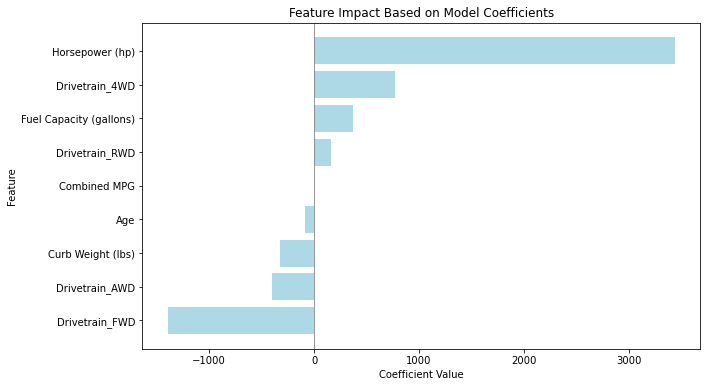

In [61]:
# Filter for functional features
functional_coefs = coefs[coefs['Feature'].isin(functional_features)]

top_functional_coefs = functional_coefs.reindex(functional_coefs['Coefficient'].sort_values(ascending=False).index)


plt.figure(figsize=(10, 6))
plt.barh(top_functional_coefs['Feature'], top_functional_coefs['Coefficient'], color='lightblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Functional Model Coefficients')
plt.axvline(0, color='grey', linewidth=0.8)
plt.gca().invert_yaxis()
plt.show()

#### Vehicle Class

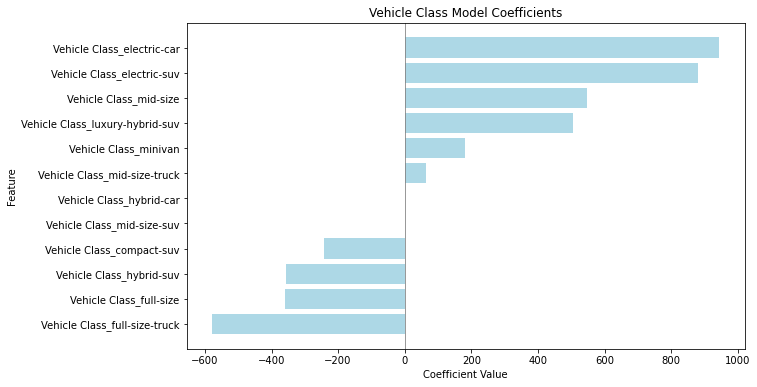

In [62]:
functional_coefs = coefs[coefs['Feature'].isin(vehicle_class_features)]

# Sort by absolute values of coefficients, preserving original signs
top_functional_coefs = functional_coefs.reindex(functional_coefs['Coefficient'].sort_values(ascending=False).index)

plt.figure(figsize=(10, 6))
plt.barh(top_functional_coefs['Feature'], top_functional_coefs['Coefficient'], color='lightblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Vehicle Class Model Coefficients')
plt.axvline(0, color='grey', linewidth=0.8)
plt.gca().invert_yaxis()
plt.show()

## Experiental

Topic Features

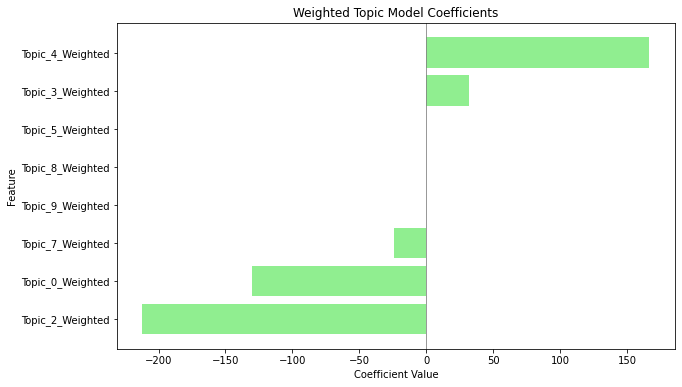

In [77]:
# Filter for experiental features
experiential_coefs = coefs[coefs['Feature'].isin(weighted_topic_features)]

# Sort by absolute values of coefficients, preserving original signs
top_experiential_coefs = experiential_coefs.reindex(experiential_coefs['Coefficient'].sort_values(ascending=False).index)

plt.figure(figsize=(10, 6))
plt.barh(top_experiential_coefs['Feature'], top_experiential_coefs['Coefficient'], color='lightgreen')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Weighted Topic Model Coefficients')
plt.axvline(0, color='grey', linewidth=0.8)
plt.gca().invert_yaxis()
plt.show()

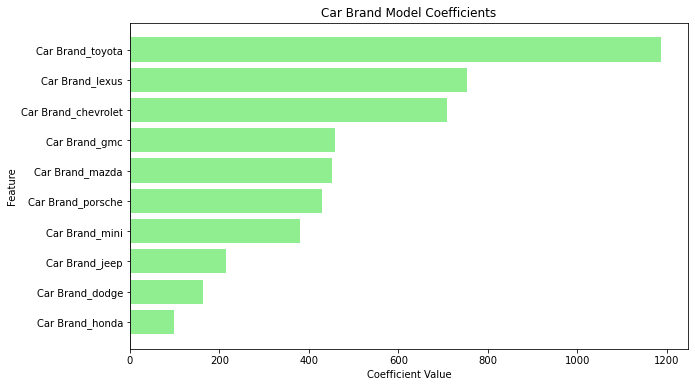

In [80]:
# Filter for experiental features
experiential_coefs = coefs[coefs['Feature'].isin(experiential_features[8:])]

# Sort by absolute values of coefficients, preserving original signs
top_experiential_coefs = experiential_coefs.reindex(experiential_coefs['Coefficient'].sort_values(ascending=False).index).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_experiential_coefs['Feature'], top_experiential_coefs['Coefficient'], color='lightgreen')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Car Brand Model Coefficients')
plt.axvline(0, color='grey', linewidth=0.8)
plt.gca().invert_yaxis()
plt.show()


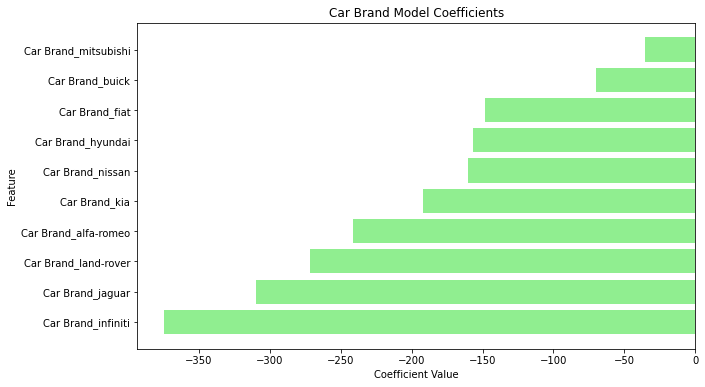

In [81]:
# Filter for experiental features
experiential_coefs = coefs[coefs['Feature'].isin(experiential_features[8:])]

# Sort by absolute values of coefficients, preserving original signs
top_experiential_bottom = experiential_coefs.reindex(experiential_coefs['Coefficient'].sort_values(ascending=False).index).tail(10)

plt.figure(figsize=(10, 6))
plt.barh(top_experiential_bottom['Feature'], top_experiential_bottom['Coefficient'], color='lightgreen')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Car Brand Model Coefficients')
plt.axvline(0, color='grey', linewidth=0.8)
plt.gca().invert_yaxis()
plt.show()

### Primary Data Used

In [ ]:
car_data_encoded